In [1]:
import numpy as np
import array

In [2]:
np.__version__

'1.19.1'

In [3]:
np?

In [4]:
%%timeit
[i for i in range(100000)]

3.48 ms ± 302 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
%%timeit
np_arr = np.arange(100000)

37.3 µs ± 2.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
np_arr = np.array([1, 2, 3, 4, 5])
type(np_arr[0])

numpy.int64

Если же необходимо явным образом задать тип данных для итогового массива, можно воспользоваться ключевым словом dtype:

In [7]:
np_arr_float = np.array([1, 2, 3, 4, 5], dtype='float32')
type(np_arr_float[0])

numpy.float32

In [8]:
%%timeit
np.array([range(i, i + 3) for i in range(1000)])

4.43 ms ± 87.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Создание массивов с нуля

In [9]:
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
np.ones((3, 5), float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [11]:
# Создаем массив размером 3 x 5, заполненный значением 3.14

np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [12]:
# Создаем массив, заполненный линейной последовательностью,
# начинающейся с 0 и заканчивающейся 20, с шагом 2
# (аналогично встроенной функции range())

np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [13]:
# Создаем массив из пяти значений,
# равномерно располагающихся между 0 и 1

np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [14]:
# Создаем массив размером 3 x 3 равномерно распределенных
# случайных значения от 0 до 1

np.random.random((3, 3))

array([[0.77433105, 0.01841255, 0.64412587],
       [0.38063537, 0.01331326, 0.75799875],
       [0.09063688, 0.47154276, 0.94575283]])

In [15]:
# Создаем массив размером 3 x 3 нормально распределенных
# случайных значения с медианой 0 и стандартным отклонением 1

np.random.normal(0, 1, (3, 3))

array([[-1.52791994, -0.5317009 , -0.45594219],
       [-2.52822453, -0.87748973, -0.72954843],
       [-0.77713643,  0.48730368,  1.8029373 ]])

In [16]:
# Создаем массив размером 3 x 3 случайных целых числа
# в промежутке [0, 10)

np.random.randint(0, 10, (3, 3))

array([[5, 2, 3],
       [4, 5, 5],
       [2, 5, 8]])

In [17]:
# Создаем единичную матрицу размером 3 x 3

np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [18]:
# Создаем неинициализированный массив из трех целочисленных
# значений. Значениями будут произвольные, случайно оказавшиеся
# в соответствующих ячейках памяти данные

np.empty(3)

array([1., 1., 1.])

## Атрибуты массивов библиотеки NumPy

In [19]:
np.random.seed(0) # начальное значение для целей воспроизводимости

In [20]:
x1 = np.random.randint(10, size=6) # одномерный массив
x2 = np.random.randint(10, size=(3, 4)) # двумерный массив
x3 = np.random.randint(10, size=(3, 4, 5)) # трехмерный массив

У каждого из массивов есть атрибуты ndim (размерность), shape (размер каждого измерения) и size (общий размер массива):

In [21]:
print(x3)

[[[8 1 5 9 8]
  [9 4 3 0 3]
  [5 0 2 3 8]
  [1 3 3 3 7]]

 [[0 1 9 9 0]
  [4 7 3 2 7]
  [2 0 0 4 5]
  [5 6 8 4 1]]

 [[4 9 8 1 1]
  [7 9 9 3 6]
  [7 2 0 3 5]
  [9 4 4 6 4]]]


In [22]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
print("dtype:", x3.dtype) #тип данных массива
print("itemsize:", x3.itemsize, "bytes") # itemsize, выводящий размер (в байтах) каждого эле- мента массива
print("nbytes:", x3.nbytes, "bytes") # nbytes, выводящий полный размер массива (в байтах)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
dtype: int64
itemsize: 8 bytes
nbytes: 480 bytes


*В отличие от списков языка Python, у массивов NumPy фикси- рованный тип данных. При попытке вставить в массив целых чисел значение с пла- вающей точкой это значение будет незаметно усечено.*

## Срезы массивов: доступ к подмассивам

Аналогично доступу к отдельным элементам массива можно использовать квадрат- ные скобки для доступа к подмассивам с помощью срезов (slicing), обозначаемых знаком двоеточия (:). Синтаксис срезов библиотеки NumPy соответствует анало- гичному синтаксису для стандартных списков языка Python. Для доступа к срезу массива x используйте синтаксис:


#### x[начало : конец : шаг]

Если какие-либо из этих значений не указаны, значения применяются по умолча- нию: начало = 0, конец = размер соответствующего измерения, шаг = 1. Мы рас- смотрим доступ к массивам в одном и нескольких измерениях.

### Одномерные подмассивы

In [23]:
x = np.arange(10)

In [24]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
x[:5]

array([0, 1, 2, 3, 4])

In [26]:
x[5:]

array([5, 6, 7, 8, 9])

In [27]:
x[4:7]

array([4, 5, 6])

In [28]:
# каждый второй элемент
x[::2]

array([0, 2, 4, 6, 8])

In [29]:
# каждый второй элемент, начиная с индекса 1
x[1::2]

array([1, 3, 5, 7, 9])

In [30]:
# все элементы в обратном порядке
x[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [31]:
# каждый второй элемент в обратном порядке,
# начиная с индекса 5

x[5::-2]

array([5, 3, 1])

### Многомерные подмассивы

Многомерные срезы задаются схожим образом, с разделением срезов запятыми. Например:

In [32]:
x2 = np.random.randint(15, size=(3, 4))

In [33]:
x2

array([[ 4,  3, 12,  4],
       [ 4,  8, 14,  4],
       [ 3, 10,  7, 13]])

In [34]:
# две строки, три столбца
x2[:2, :3]

array([[ 4,  3, 12],
       [ 4,  8, 14]])

In [35]:
# все строки, каждый второй столбец
x2[:3, ::2]

array([[ 4, 12],
       [ 4, 14],
       [ 3,  7]])

In [36]:
# Измерения подмассивов также можно «переворачивать»:
x2[::-1, ::-1]

array([[13,  7, 10,  3],
       [ 4, 14,  8,  4],
       [ 4, 12,  3,  4]])

#### Доступ к строкам и столбцам массива

Часто возникает необходимость в доступе к отдельным строкам или столбцам массива. Предоставить доступ можно путем комбинации индексации и среза, с по- мощью пустого среза, задаваемого двоеточием (:):

In [37]:
#  первый столбец массива x2
x2[:, 0]

array([4, 4, 3])

In [38]:
# первая строка массива x2
x2[0, :]

array([ 4,  3, 12,  4])

В случае предоставления доступа к строке пустой срез можно опустить ради более лаконичного синтаксиса:

In [39]:
x2[0]

array([ 4,  3, 12,  4])

Срезы массивов возвращают представления (views), а не копии (copies) данных массива. Этим срезы массивов библиотеки NumPy отличаются от срезов списков языка Python (в списках срезы являются копиями). Извлечем из нашего массива двумерный подмассив 2 × 2:

In [40]:
x2_sub = x2[:2, :2]

In [41]:
x2_sub

array([[4, 3],
       [4, 8]])

Теперь, если мы изменим этот подмассив, увидим, что исходный массив также поменялся

In [42]:
x2_sub[0, 0] = 99

In [43]:
print(x2_sub)

[[99  3]
 [ 4  8]]


In [44]:
print(x2)

[[99  3 12  4]
 [ 4  8 14  4]
 [ 3 10  7 13]]


Такое поведение по умолчанию действительно очень удобно: при работе с боль- шими наборами данных не требуется копировать базовый буфер данных для об- ращения к их частям и обработки этих частей.

#### Создание копий массивов

In [45]:
x2_sub_copy = x2[:2, :2].copy()

In [46]:
x2_sub_copy[0, 0] = 100

In [47]:
print(x2_sub_copy)

[[100   3]
 [  4   8]]


In [48]:
print(x2)

[[99  3 12  4]
 [ 4  8 14  4]
 [ 3 10  7 13]]


#### Изменение формы массивов

Еще одна удобная операция — изменение формы массивов методом reshape(). На- пример, если вам требуется поместить числа от 1 до 9 в таблицу 3 × 3, сделать это можно следующим образом:

In [49]:
np.arange(1, 10).reshape((3,3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [50]:
x = np.array([1, 2, 3])

In [51]:
# Преобразование в вектор-строку с помощью reshape
x.reshape((1, 3))

array([[1, 2, 3]])

In [52]:
# Преобразование в вектор-строку посредством newaxis
x[np.newaxis, :]

array([[1, 2, 3]])

In [53]:
# Преобразование в вектор-столбец с помощью reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [54]:
# Преобразование в вектор-столбец посредством newaxis
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

### Слияние массивов

Слияние, или объединение, двух массивов в библиотеке NumPy выполняется в основном с помощью методов **np.concatenate**, **np.vstack** и **np.hstack**. Метод np.concatenate принимает на входе кортеж или список массивов в качестве перво- го аргумента:

In [55]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])

np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

Для объединения двумерных массивов можно также использовать np.concatenate:

In [56]:
grid = np.array([[1, 2, 3], [4, 5, 6]])
print(grid)

[[1 2 3]
 [4 5 6]]


In [57]:
# слияние по первой оси координат
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [58]:
# слияние по второй оси координат (с индексом 0)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

Для работы с массивами с различающимися измерениями удобнее и понятнее использовать функции **np.vstack** (вертикальное объединение) и **np.hstack** (гори- зонтальное объединение):

In [59]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7], [6, 5, 4]])

# Объединяет массивы по вертикали
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [60]:
# Объединяет массивы по горизонтали
y = np.array([[99], [99]])

np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

Функция **np.dstack** аналогично объединяет массивы по третьей оси.

## Разбиение массивов

Противоположностью слияния является разбиение, выполняемое с помощью функций **np.split, np.hsplit и np.vsplit**. Каждой из них необходимо передавать список индексов, задающих точки раздела:

In [61]:
x = [1, 2, 3, 99, 99, 3, 2, 1]

x1, x2, x3 = np.split(x, [3, 5])

print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


Обратите внимание, что N точек раздела означают N + 1 подмассив. Соответству- ющие функции np.hsplit и np.vsplit действуют аналогично:

In [62]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [63]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [64]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


Функция np.dsplit аналогично разделяет массивы по третьей оси.

## Тригонометрические функции

Библиотека NumPy предоставляет множество универсальных функций, одни из наиболее важных — тригонометрические функции. Начнем с описания массива углов:

In [65]:
theta = np.linspace(0, np.pi, 3)

Теперь мы можем вычислить некоторые тригонометрические функции от этих значений:

In [66]:
print("theta = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


## Показательные функции и логарифмы

In [67]:
x = [1, 2, 3]

print("x =", x)
print("e^x =", np.exp(x))
print("2^x =", np.exp2(x))
print("3^x =", np.power(3, x))

x = [1, 2, 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3  9 27]


Функции, обратные к показательным, и логарифмы также имеются в библиотеке. Простейшая функция np.log возвращает натуральный логарифм числа. Если вам требуется логарифм по основанию 2 или 10, они также доступны:

In [68]:
x = [1, 2, 4, 10]

print("x =", x)
print("ln(x) =", np.log(x))
print("log2(x) =", np.log2(x))
print("log10(x) =", np.log10(x))

x = [1, 2, 4, 10]
ln(x) = [0.         0.69314718 1.38629436 2.30258509]
log2(x) = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


## Специализированные универсальные функции

В библиотеке NumPy имеется немало других универсальных функций, включая гиперболические тригонометрические функции, поразрядную арифметику, опера- торы сравнения, преобразования из радианов в градусы, округление и остатки от деления, а также многое другое. Если вы заглянете в документацию по библиотеке NumPy, то откроете для себя немало интересной функциональности.
Если один замечательный источник специализированных и сложных универ- сальных функций — подмодуль scipy.special. Если вам необходимо вычислить значение какой-то хитрой математической функции на ваших данных, очень воз- можно, что эта функциональность уже реализована в scipy.special. Следующий фрагмент кода демонстрирует несколько функций, которые могут пригодиться для статистических вычислений:

In [69]:
from scipy import special

In [70]:
x = [1, 5, 10]

print("gamma(x) =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2) =", special.beta(x, 2))

gamma(x) = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2) = [0.5        0.03333333 0.00909091]


## Указание массива для вывода результата

При больших вычислениях удобно задать массив, в котором будет сохранен резуль- тат вычисления. Вместо того чтобы создавать временный массив, можно восполь- зоваться этой возможностью для записи результатов вычислений непосредственно в нужное вам место памяти. Сделать это для любой универсальной функции можно с помощью аргумента out:

In [71]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)

print(y)

[ 0. 10. 20. 30. 40.]


Эту возможность можно использовать даже вместе с представлениями массивов. Например, можно записать результаты вычислений в каждый второй элемент за- данного массива:

In [72]:
y = np.zeros(10)
np.power(2, x, out=y[::2])

print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


Если бы мы вместо этого написали y[::2] = 2 ** x, был бы создан временный массив для хранения результатов операции 2 ** x с последующим копированием этих значений в массив y. Для столь незначительных объемов вычислений особой разницы нет, но для очень больших массивов экономия памяти за счет аккуратного использования аргумента out может оказаться значительной.

## Сводные показатели

вызов метода reduce для универсальной функции add возвращает сумму всех элементов массива:

In [73]:
x = np.arange(1, 6)
np.add.reduce(x)

15

In [74]:
np.multiply.reduce(x)

120

Если же мы хотим сохранить все промежуточные результаты вычислений, можно вместо reduce воспользоваться функцией accumulate:

In [75]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

## Суммирование значений из массива

In [76]:
L = np.random.random(100)

sum(L)

51.163886927509324

In [77]:
np.sum(L)

51.16388692750932

поскольку функция sum выполняет операцию в скомпилированном коде, версия библиотеки NumPy данной операции работает намного быстрее:

In [78]:
big_array = np.random.rand(1000000)

%timeit sum(big_array)
%timeit np.sum(big_array)

124 ms ± 928 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
364 µs ± 5.61 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [79]:
%timeit min(big_array)
%timeit np.min(big_array)

89.6 ms ± 6.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
509 µs ± 76.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [80]:
%timeit max(big_array)
%timeit np.max(big_array)

85 ms ± 4.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
596 µs ± 223 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Многомерные сводные показатели

Агрегирование по столбцу или строке — один из часто применяемых видов операций агрегирования. Пусть имеются какие-либо данные, находящиеся в двумерном массиве:

In [81]:
M = np.random.random((3, 4))
print(M)

[[0.53509    0.88518089 0.25518136 0.13130483]
 [0.95884927 0.17809462 0.61130112 0.7044003 ]
 [0.89172417 0.51511729 0.73705298 0.17818634]]


По умолчанию все функции агрегирования библиотеки NumPy возвращают свод- ный показатель по всему массиву:

In [82]:
M.sum()

6.581483155011551

Но функции агрегирования принимают на входе дополнительный аргумент, по- зволяющий указать ось, по которой вычисляется сводный показатель. Например, можно найти минимальное значение каждого из столбцов, указав axis=0:

In [83]:
M.min(axis=0)

array([0.53509   , 0.17809462, 0.25518136, 0.13130483])

Аналогично можно вычислить максимальное значение в каждой из строк:

In [84]:
M.max(axis=1)

array([0.88518089, 0.95884927, 0.89172417])

![agg-functions.png](attachment:agg-functions.png)

### Пример: чему равен средний рост президентов США

In [85]:
import pandas as pd
data = pd.read_csv('./../data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Теперь, получив такой массив данных, мы можем вычислить множество сводных статистических показателей:

In [86]:
print("Mean height: ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height: ", heights.min())
print("Maximum height: ", heights.max())

Mean height:  179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:  163
Maximum height:  193


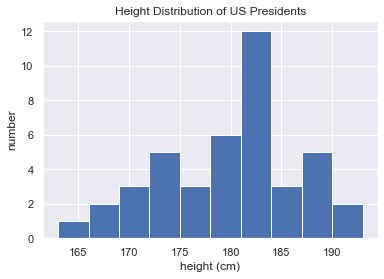

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # задает стиль графика

plt.hist(heights)
plt.title('Height Distribution of US Presidents') # Распределение роста

# президентов США
plt.xlabel('height (cm)') # Рост, см
plt.ylabel('number'); # Количество

## Операторы сравнения как универсальные функции

In [88]:
x = np.array([1, 2, 3, 4, 5])

In [89]:
x < 3

array([ True,  True, False, False, False])

In [90]:
x[x <= 3]

array([1, 2, 3])

In [91]:
x[x > 3]

array([4, 5])

In [92]:
np.count_nonzero(x < 3)

2

In [93]:
np.sum(x < 3)

2

In [94]:
np.any(x < 3)

True

In [95]:
np.any(x > 6)

False

In [96]:
# Все ли значения меньше 3?
np.all(x > 3)

False

In [97]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [98]:
np.all(x < 8, axis=1)

array([ True, False,  True])

In [99]:
np.all((x>0)&(x<6))

False

In [100]:
np.any((x>2)&(x<5))

True

![bitwise.png](https://github.com/ekalachev/skill_factory/blob/master/data/bitwise.png?raw=1)

## «Прихотливая» индексация

Суть «прихотливой» индексации проста: она заключается в передаче массива
индексов с целью одновременного доступа к нескольким элементам массива. Например, рассмотрим следующий массив:

In [101]:
rand = np.random.RandomState(42)

In [102]:
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [103]:
indexes = [3, 7, 4]
x[indexes]

array([71, 86, 60])

В случае «прихотливой» индексации форма результата отражает форму массивов
индексов (index arrays), а не форму индексируемого массива:

In [104]:
indexes = np.array([[3, 7], [4, 5]])
x[indexes]

array([[71, 86],
       [60, 20]])

«Прихотливая» индексация работает и в случае многомерных массивов. Рассмотрим следующий массив:

In [105]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [106]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])

X[row, col]

array([ 2,  5, 11])

если мы скомбинируем вектор-столбец и вектор-строку в индексах, то получим двумерный результат:

In [107]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

При работе с «прихотливой» индексацией важно никогда не забывать, что возвращаемое значение отражает транслируемую форму индексов, а не форму индексируемого массива.

## Комбинированная индексация

Для реализации еще более сложных операций «прихотливую» индексацию можно использовать совместно с другими схемами индексации:

In [108]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [109]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [110]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## Пример: выборка случайных точек

Частая сфера применения «прихотливой» индексации — выборка подмножеств
строк из матрицы. Пусть у нас имеется матрица размером N на D, представляющая
N точек в D измерениях, например следующие точки, полученные из двумерного
нормального распределения:

In [111]:
mean = [0, 0]
cov = [[1, 2], [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

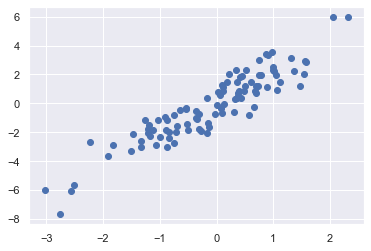

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling
plt.scatter(X[:, 0], X[:, 1]);

Воспользуемся «прихотливой» индексацией для выборки 20 случайных точек.
Мы сделаем это с помощью выбора предварительно 20 случайных индексов
без повторов и воспользуемся этими индексами для выбора части исходного
массива:

In [113]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([20, 13, 46, 99,  0, 31, 36, 35, 10, 30, 40, 97,  2, 16, 37, 66, 49,
        5, 15, 28])

In [114]:
selection = X[indices] # Тут используется «прихотливая» индексация
selection.shape

(20, 2)

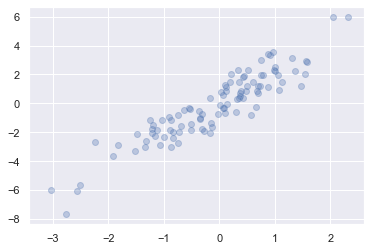

In [115]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', s=200);

## Изменение значений с помощью прихотливой индексации

Аналогично тому, как «прихотливую» индексацию можно использовать для доступа к частям массива, ее можно применять и для модификации частей массива.
Например, допустим, что у нас есть массив индексов и нам нужно присвоить соответствующим элементам массива какие-то значения:

In [116]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [117]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Метод at() применяет соответствующий оператор к элементам с заданными индексами (в данном случае i) с использованием заданного значения (в данном случае 1).
Аналогичный по духу метод универсальных функций reduceat(), о котором можно
прочитать в документации библиотеки NumPy.

In [118]:
i = [2, 3, 3, 4, 4, 4]

x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


# Сортировка массивов

Например, простая сортировка вставкой (insertion sort) многократно находит
минимальное значение из списка и выполняет перестановки до тех пор, пока
список не будет отсортирован. Это можно запрограммировать с помощью всего
нескольких строк кода на языке Python:

In [119]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
        
    return x

x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

Сортировка вставкой удобна из-за своей простоты, но слишком медлительна,
чтобы подходить для массивов большего размера. Для списка из N значений она
потребует N циклов, каждый из них выполняет порядка ~N сравнений для поиска
значения, которое нужно переставить. На языке нотации «О-большого», часто используемой для описания характеристик этих алгоритмов (см. врезку «Нотация
“О-большого”» далее), временная сложность сортировки вставкой в среднем имеет
порядок O[N**2]: при удвоении количества элементов списка время выполнения вырастет примерно в четыре раза.

Даже сортировка выбором гораздо лучше моего фаворита среди всех алгоритмов
сортировки — случайной сортировки (bogosort):

In [120]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)

    return x

x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

Этот алгоритм сортировки опирается в своей работе на чистое везение: он многократно перетасовывает массив случайным образом до тех пор, пока результат не
окажется отсортированным. При средней сложности порядка O[N × N!]: (это N умножить на N факториал) его не стоит использовать ни для каких реальных расчетов.
В Python имеются намного более эффективные встроенные алгоритмы сортировки.
Начнем с изучения встроенных алгоритмов языка Python, после чего рассмотрим утилиты, включенные в библиотеку NumPy и оптимизированные под NumPy-массивы.

## Быстрая сортировка в библиотеке NumPy: функции **np.sort** и **np.argsort**

Хотя в языке Python имеются встроенные функции sort и sorted для работы со
списками, мы не будем их рассматривать, поскольку функция библиотеки NumPy
**np.sor**t оказывается намного более эффективной и подходящей для наших целей.
По умолчанию функция **np.sort** использует имеющий сложность O[N log N]:
алгоритм быстрой сортировки (**quicksort**), хотя доступны для использования
также алгоритмы сортировки слиянием (**mergesort**) и пирамидальной сортировки
(heapsort). Для большинства приложений используемой по умолчанию быстрой
сортировки более чем достаточно.

Чтобы получить отсортированную версию входного массива без его изменения,
можно использовать функцию **np.sort**:

In [121]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)


array([1, 2, 3, 4, 5])

Если же вы предпочитаете отсортировать имеющийся массив, то можно вместо
этого применять метод sort массивов:

In [122]:
x.sort()
print(x)

[1 2 3 4 5]


Имеется также родственная функция argsort, возвращающая индексы отсортированных элементов:

In [123]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


## Сортировка по строкам и столбцам. 

У алгоритмов сортировки библиотеки NumPy имеется удобная возможность выполнять сортировку по конкретным строкам или столбцам многомерного массива путем задания аргумента axis. Например:

In [124]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [125]:
# Сортируем все столбцы массива X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [126]:
# Сортируем все строки массива X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

Не забывайте, что при этом все строки или столбцы рассматриваются как отдельные массивы, так что любые возможные взаимосвязи между значениями строк или
столбцов будут утеряны.

## Частичные сортировки: секционирование

Иногда нам не требуется сортировать весь массив, а просто нужно найти K наименьших значений в нем. Библиотека NumPy предоставляет для этой цели функцию **np.partition**. Функция **np.partition** принимает на входе массив и число K.
Результат представляет собой новый массив с K наименьшими значениями слева
от точки разбиения и остальные значения справа от нее в произвольном порядке:

In [127]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

Первые три значения в итоговом массиве — три наименьших значения в нем, а на
остальных позициях массива располагаются все прочие значения. Внутри каждой
из двух секций элементы располагаются в произвольном порядке.

Аналогично сортировке можно секционировать по произвольной оси многомерного массива:

In [128]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

## Пример: K ближайших соседей

Давайте вкратце рассмотрим, как можно использовать функцию np.argpartition
по нескольким осям для поиска ближайших соседей каждой точки из определенного набора. Начнем с создания случайного набора из десяти точек на двумерной
плоскости. По стандартным соглашениям образуем из них массив 10 × 2:

In [129]:
X = rand.rand(10, 2)
X

array([[0.00706631, 0.02306243],
       [0.52477466, 0.39986097],
       [0.04666566, 0.97375552],
       [0.23277134, 0.09060643],
       [0.61838601, 0.38246199],
       [0.98323089, 0.46676289],
       [0.85994041, 0.68030754],
       [0.45049925, 0.01326496],
       [0.94220176, 0.56328822],
       [0.3854165 , 0.01596625]])

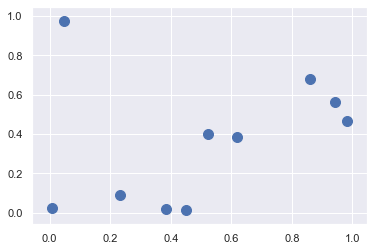

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

Теперь можно вычислить расстояние между всеми парами точек. Вспоминаем,
что квадрат расстояния между двумя точками равен сумме квадратов расстояний между ними по каждой из координат. Воспользовавшись возможностями
эффективного транслирования и агрегирования предоставляемыми библиотекой NumPy, мы можем вычислить матрицу квадратов расстояний с помощью одной строки кода:


In [131]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:])**2, axis=-1)

На всякий случай для контроля проверим, что диагональ матрицы (то есть набор
расстояний между каждой точкой и ей самой) состоит из нулей:

In [132]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Проверка пройдена! Теперь, получив матрицу квадратов расстояний между взятыми попарно точками, мы можем воспользоваться функцией np.argsort для
сортировки по каждой строке. Крайние слева столбцы будут представлять собой
индексы ближайших соседей:

In [133]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


Обратите внимание, что первый столбец представляет собой числа с 0 до 9 в порядке возрастания: это происходит из-за того, что ближайший сосед каждой точки — она сама, как и можно было ожидать.
Выполнив полную сортировку, мы проделали лишнюю работу. Если нас интересовали K ближайших соседей, было достаточно секционировать все строки так,
чтобы сначала шли K+1 минимальных квадратов расстояний, а большие расстояния
заполняли оставшиеся позиции массива. Сделать это можно с помощью функции
np.argpartition:

In [134]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

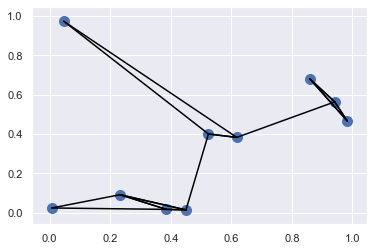

In [135]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# Рисуем линии из каждой точки к ее двум ближайшим соседям
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # чертим линию от X[i] до X[j]
        # Используем для этого «магическую» функцию zip:
        plt.plot(*zip(X[j], X[i]), color='black')

От каждой нарисованной на диаграмме точки ведут линии к двум ее ближайшим
соседям. На первый взгляд может показаться странным, что из некоторых точек
отходит более двух линий. Дело в том, что, если точка A — один из двух ближайших соседей точки B, вовсе не обязательно, что точка B — один из двух ближайших соседей точки A.

Хотя применяемые при этом транслирование и построчная сортировка могут
показаться более запутанным подходом, чем написание цикла, оказывается, что
такой способ работы с подобными данными на языке Python весьма эффективен.
Как бы ни было заманчиво сделать то же самое, вручную организовав цикл по
данным и сортировку каждого набора соседей отдельно, получившийся в итоге
алгоритм почти наверняка будет работать медленнее, чем рассмотренная выше
векторизованная версия. Красота такого подхода — в его независимости от размера входных данных: можно с одинаковой легкостью вычислить соседей среди
100 или 1 000 000 точек в любом количестве измерений, и код будет выглядеть
точно так же.

# Структурированные данные: структурированные массивы библиотеки NumPy

In [136]:
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),  'formats':('U10', 'i4', 'f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


'U10' означает «строку в кодировке Unicode максимальной длины 10», 'i4' —
«4-байтное (то есть 32-битное) целое число», а 'f8' — «8-байтное (то есть 64-битное) число с плавающей точкой». Мы обсудим другие варианты подобного кодирования типов в следующем разделе.

In [137]:
data['name'] = ['Alice', 'Bob', 'Ivan', 'Doug']
data['age'] = [25, 30, 35, 40]
data['weight'] = [50, 60, 70, 80]

print(data)

[('Alice', 25, 50.) ('Bob', 30, 60.) ('Ivan', 35, 70.) ('Doug', 40, 80.)]


In [138]:
data[data['age'] < 30]['name']

array(['Alice'], dtype='<U10')

## Создание структурированных массивов

Типы данных для структурированных массивов можно задавать несколькими
способами. Ранее мы рассмотрели метод с использованием словаря:

In [139]:
 np.dtype({'names':('name', 'age', 'weight'), 'formats':('U10', 'i4', 'f8')})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [140]:
np.dtype({'names':('name', 'age', 'weight'), 'formats':((np.str_, 10), int, np.float32)})

dtype([('name', '<U10'), ('age', '<i8'), ('weight', '<f4')])

In [141]:
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

Если названия типов для вас не важны, можете задать только сами типы данных
в разделенной запятыми строке:

In [142]:
np.dtype('S10,i4,f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

Сокращенные строковые коды форматов могут показаться запутанными, но они
основаны на простых принципах. Первый (необязательный) символ — < или >,
означает «число с прямым порядком байтов» или «число с обратным порядком байтов» соответственно и задает порядок значащих битов. Следующий символ задает
тип данных: символы, байтовый тип, целые числа, числа с плавающей точкой и т. д.
(табл. 2.6). Последний символ или символы отражают размер объекта в байтах.

![numPyTypes.png](https://github.com/ekalachev/skill_factory/blob/master/data/numPyTypes.png?raw=1)